In [1]:
import numpy as np
import pandas as pd
import yfinance as yf
import datetime as dt
import matplotlib.pyplot as plt
import statsmodels.api as sm
import itertools

# Correlation S&P 500 weight change and Stocks Volatility
# Volatility of SP 500 constituents and SP 500

In [2]:
# Importing ticker data and holdings data in S&P 500 index(SPY)
# Mind update of S&P 500
url = "https://en.wikipedia.org/wiki/List_of_S%26P_500_companies"

tables = pd.read_html(url)
sp500_table = tables[0]

tickers = sp500_table['Symbol'].str.replace('.', '-').tolist()
# print(tickers)

In [3]:
pip install --upgrade yfinance

Note: you may need to restart the kernel to use updated packages.


In [4]:
# API call on stocks, time frame: 2019-01-01 to 2022-01-01
today = dt.date(2022, 1, 1)
# print(today)
n_years = (today - dt.timedelta(days=3*365)).strftime('%Y-%m-%d')
# print(n_years)

data_d = yf.download(tickers, start=n_years, end=today)
print(data_d)

# Turning pandas Series into pandas DataFrame
# Drop every missing value
close_price = pd.DataFrame(data_d['Close']).dropna(axis=1)
print(close_price)

[*********************100%%**********************]  503 of 503 completed

6 Failed downloads:
['GEHC', 'GEV', 'KVUE', 'VLTO', 'CEG', 'SOLV']: YFChartError("%ticker%: Data doesn't exist for startDate = 1546405200, endDate = 1641013200")


Price        Adj Close                                                 \
Ticker               A        AAL        AAPL        ABBV        ABNB   
Date                                                                    
2019-01-02   63.278915  31.963158   37.793781   69.330482         NaN   
2019-01-03   60.947723  29.581665   34.029243   67.046120         NaN   
2019-01-04   63.057362  31.530161   35.481922   69.206146         NaN   
2019-01-07   64.396347  32.425678   35.402946   70.216232         NaN   
2019-01-08   65.340370  31.904110   36.077839   70.542564         NaN   
...                ...        ...         ...         ...         ...   
2021-12-27  156.105286  18.170000  177.824463  122.029892  171.679993   
2021-12-28  156.537964  18.540001  176.798889  122.011742  169.710007   
2021-12-29  157.983566  18.049999  176.887680  122.892395  167.440002   
2021-12-30  158.209778  18.070000  175.724060  123.409874  168.779999   
2021-12-31  157.000168  17.959999  175.102844  122.

In [5]:
close_price
file_name = 'close_price_1.xlsx'
close_price.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [6]:
# Replace column name to stock ticker for convenience of indexing, then transpose,
# so that row label is the ticker, with columns being dates
close_price.rename(columns={'Close': tickers}, inplace=True)
# print(close_price['NVDA'])
close_price_t = close_price.T
# print(close_price_t)

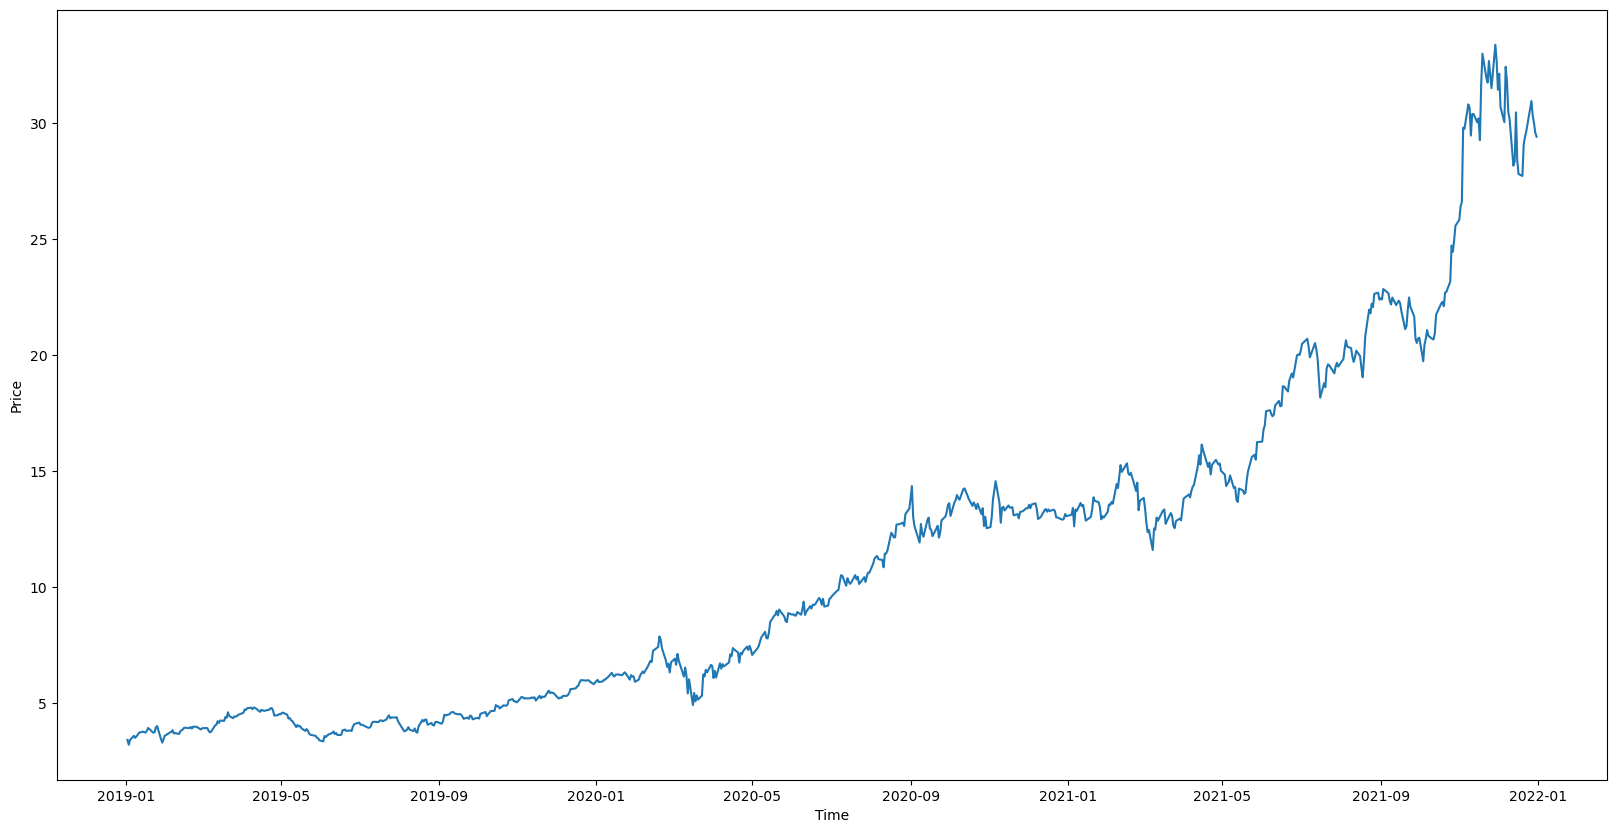

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(close_price['NVDA'].T)
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()

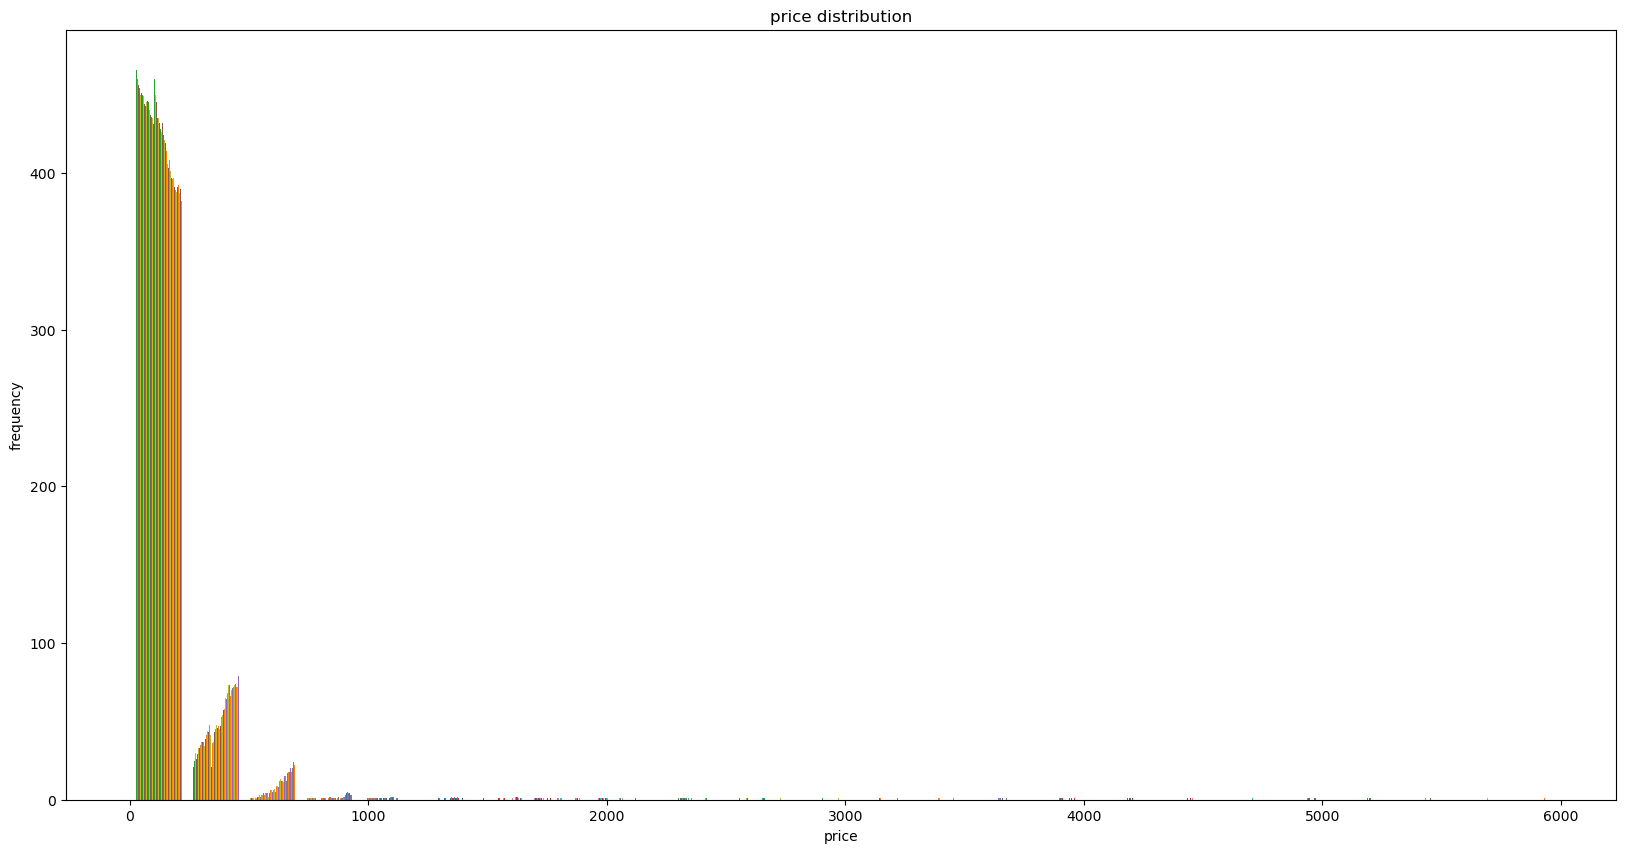

In [8]:
plt.figure(figsize=(20, 10))
plt.hist(close_price.T, bins=25)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('price distribution')
plt.show()

In [9]:
# Turning pandas dataframe into python list, to zip into a dictionary.
close_prices = close_price.values.tolist()
# print(close_prices)
# np.array(close_prices[0]).shape

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


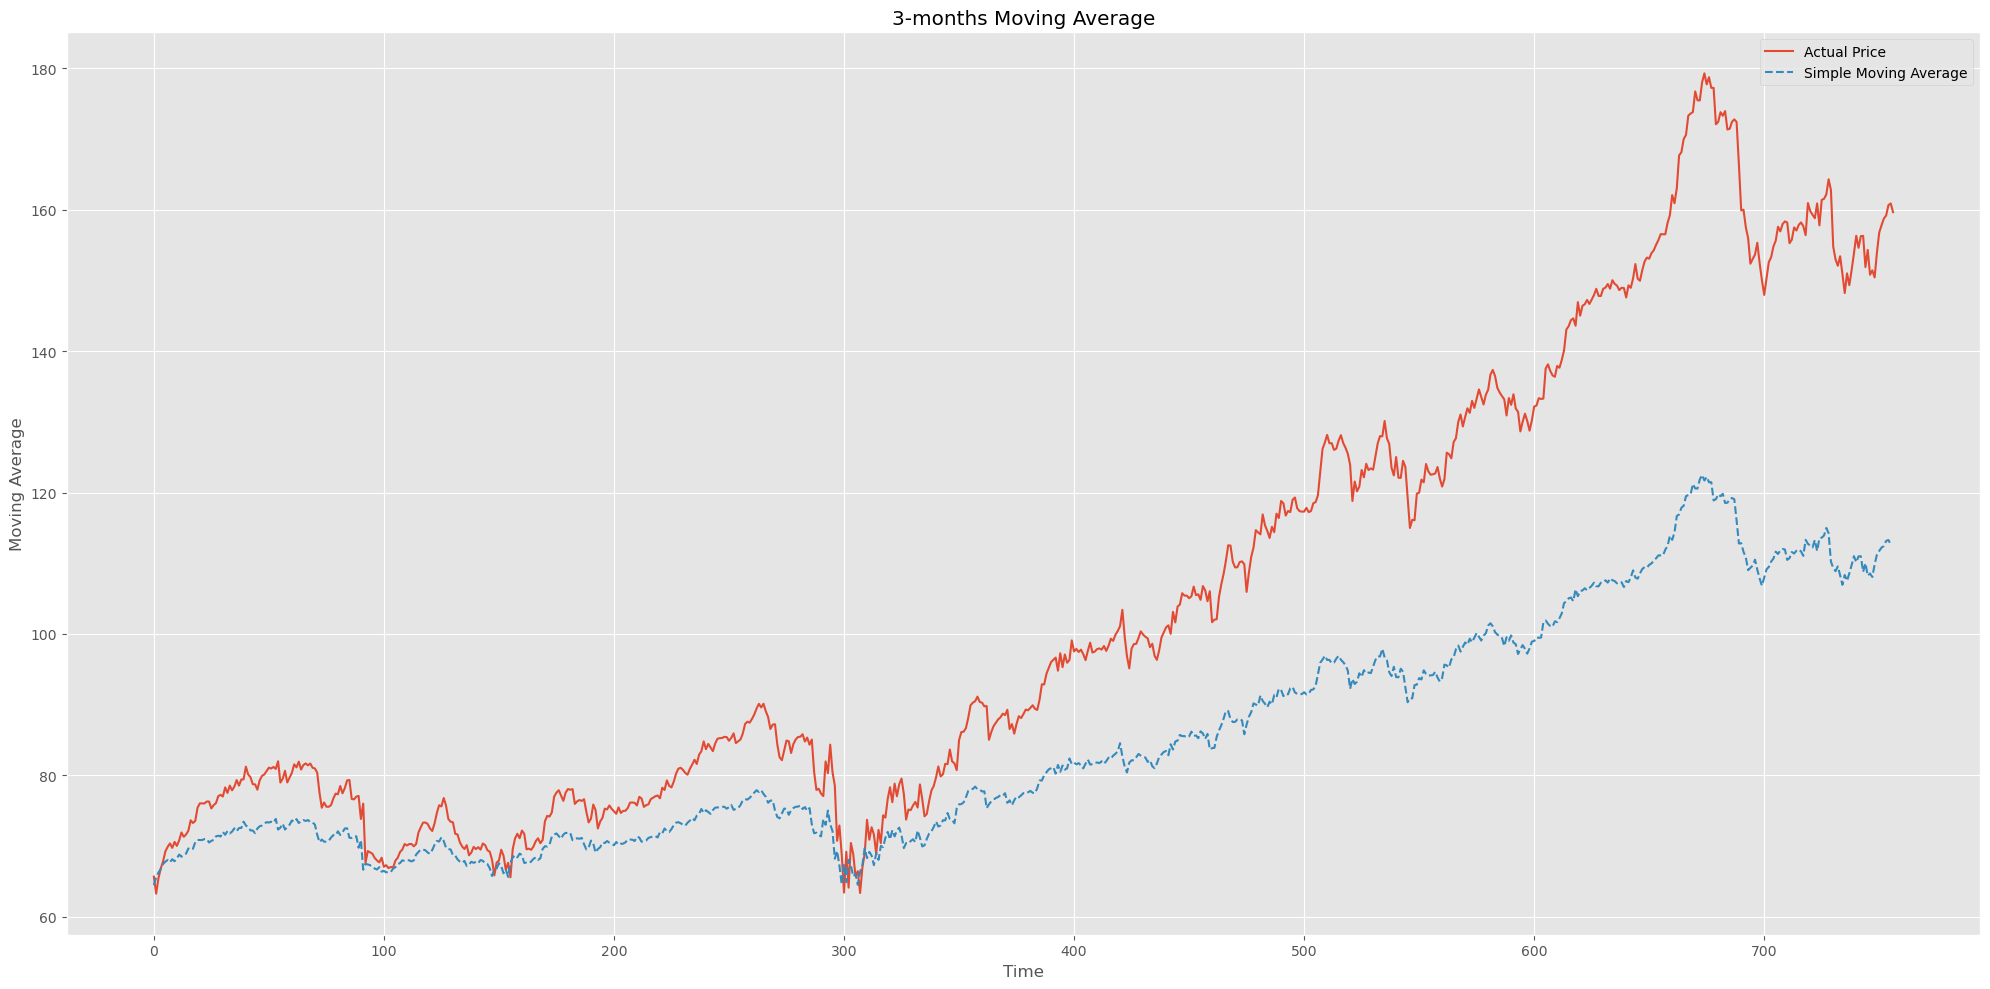

In [10]:
# Simple Moving Average

close_prices = close_price_t.values.tolist()

sma = []
for i in pd.Series(close_prices[0]):
    for j in pd.Series(close_prices[0]).shift(-1):
        sma.append((i + j) / 2)
    break
# ma = pd.Series(ma).dropna().tolist()
# print(ma)

print(plt.style.available)

plt.style.use('ggplot')
plt.figure(figsize=(20, 10))
plt.plot(close_prices[0], label='Actual Price')
plt.plot(sma, linestyle='--', label='Simple Moving Average')
plt.xlabel('Time')
plt.ylabel('Moving Average')
plt.title('3-months Moving Average')
plt.legend()
plt.tight_layout()
plt.show()
# (pd.Series(close_prices[0][0]) + (pd.Series(close_prices[0]).shift(-1)[0])) / 2

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(np.array(close_prices), bins=100)
plt.xlabel('price')
plt.ylabel('frequency')
plt.title('price distribution')
plt.show()

In [ ]:
# Create dictionary with ticker and prices list
close_p = {}
for key in tickers:
    for value in close_prices:
        close_p[key] = value
        close_prices.remove(value)
        break
# print(close_p)

In [ ]:
np.log(pd.DataFrame(close_p[('MSFT')]) / pd.DataFrame(close_p[('MSFT')]).shift(1))

In [ ]:
close_prices = close_price_t.values.tolist()
print(close_prices)

# Log Price

In [ ]:
log_p = np.log(close_prices)
print(log_p)

In [ ]:
plt.figure(figsize=(20, 10))
plt.hist(log_p, bins=100)
plt.xlabel('log price')
plt.ylabel('frequency')
plt.title('log price distribution')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(log_p, lw = 1.0)
plt.xlabel('stock')
plt.ylabel('log price')
plt.show()

# Log Return

In [ ]:
pd_p = pd.DataFrame(close_prices)
# print(pd_p.T)
# print(pd_p.T.shift(1))

log_ret = np.log(pd_p.T / pd_p.T.shift(1)).dropna()
# print(log_ret)
# print(log_ret.T)
# print(np.array(log_ret.T).shape)

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(log_ret, lw=1.0)
plt.xlabel('days')
plt.ylabel('log return')
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
plt.plot(log_ret.T, lw=0.5)
plt.xlabel('days')
plt.ylabel('log_return')
plt.show()

In [ ]:
print(np.array(log_ret.T))

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(np.array(log_ret.T), bins=100)
plt.xlabel('log_price')
plt.ylabel('frequency')
plt.title('log_return_dist')
plt.show()

In [ ]:
# Standard Deviaiton and Variance Matrix of Constituents log prices
var = []
for c in range(len(log_p)):
    var.append(np.var(log_p[c]))
# print(var)
std = np.sqrt(var)
# print(std)

# 2024-4-30

In [ ]:
# daily prices of SP500 and datatype transformation
sp500 = yf.download('SPY', start=n_years, end=today)

sp_close = sp500['Close']
print(sp_close)
# print(type(sp_close))

sp_close = pd.DataFrame(sp_close)
print(sp_close)
# print(type(sp_close))

sp_close.rename(columns={'Close': 'S&P 500'}, inplace=True)
sp_t = sp_close.T.dropna()
print(sp_t)
# print(type(sp_t))

In [ ]:
sp_list = sp_t.values.tolist()

In [ ]:
np.corrcoef(close_prices[:][0], sp_list)

In [ ]:
# numypy correlation coefficient
corr_coef_np = []
for i in close_prices:
    corr_coef_np.append((np.corrcoef(i, sp_list)[:][0][1]).tolist())
# print(corr_coef_np)

In [ ]:
def corr_coef(x, y):
    from math import sqrt
    try:
        n = len(x[0])
    except TypeError:
        n = len(x)

    prod = []
    for i in y:
        prod.append((np.array(i) * np.array(x[0])).tolist())

    sum_prod = []
    sum_prod = sum(np.array(prod).T).tolist()
    
    n_sum_prod = []
    for i in sum_prod:
        n_sum_prod.append(n * i)
    
    try:
        sum_x = sum(x[0])
    except TypeError:
        sum_x = sum(x)

    sum_y = []
    for i in y:
        sum_y.append(sum(i))

    prod_sumx_sumy = (sum_x * np.array(sum_y)).tolist()

    numerator = (np.array(n_sum_prod) - np.array(prod_sumx_sumy)).tolist()

    squared_sum_x = sum_x ** 2

    squared_sum_y = (np.array(sum_y) ** 2).tolist()
    # print('(sum_y)^2 =', squared_sum_y)

    x_square = []
    try:
        for xi in x[0]:
            x_square.append(xi ** 2)
    except TypeError:
        for x in x:
            x_square.append(x ** 2)

    x_square_sum = sum(x_square)

    y_square = []
    for yi in y:
        y_square.append((np.array(yi) ** 2).tolist())

    y_square_sum = []
    for i in y_square:
        y_square_sum.append(sum(np.array(i)))

    denominator1 = sqrt(n * x_square_sum  - squared_sum_x)

    denominator2 = (np.sqrt(n * np.array(y_square_sum) - np.array(squared_sum_y))).tolist()

    # SP 500 price and constituents price correlation coefficient
    corr_coef = (np.array(numerator) / (np.array(denominator1) * np.array(denominator2))).tolist()

    # Error of numpy correlation coefficient
    error = (np.array(corr_coef) - np.array(corr_coef_np)) / np.array(corr_coef_np)
    
    return corr_coef, error

In [ ]:
corr_coef(sp_list, close_prices)

# Parameters
Gold Price, Crude Oil Price, 10-year Treasury Yield, Stock Volume  
Volatility Index(VIX), Puchase Manager Index(PMI)...  
More economic indicator (either lagging or leading)

In [ ]:
close_price
close_price_list = np.array(close_price).T.tolist()
# print(close_price_list)

In [ ]:
# Stock Volume
volume = data_d['Volume'].dropna(axis=1).replace(0, 1)
volume_t = pd.DataFrame(volume)
volume_list = np.array(volume.T).tolist()
volume_array = np.array(volume.T)
print(volume_t)
# print(volume_list[0])
# print(volume_array[0])

In [ ]:
# 10-year Treasury Bond Yield
risk_free = yf.download('^TNX', start=n_years, end=today)['Close']
risk_free_t = risk_free
risk_free_list = risk_free.loc[n_years:today].tolist()
risk_free_array = np.array(risk_free)
print(risk_free_t)
# print(risk_free_list)
# print(risk_free_array)

In [ ]:
# Crude Oil Price
crude_oil = pd.DataFrame(yf.download('CL=F', start=n_years, end=today)['Close'])
crude_oil_t = crude_oil
crude_oil_list = list(itertools.chain(*np.array(crude_oil).tolist()))
crude_oil_array = np.array(crude_oil_t)
print(crude_oil_t)
# print(crude_oil_list)
# print(crude_oil_array)

In [ ]:
# Gold Price
gold = yf.download('GC=F', start=n_years, end=today)['Close']
gold_t = gold
gold_list = gold.tolist()
gold_array = np.array(gold.T)
print(gold_t)
# print(gold_list)
# print(gold_array)

In [ ]:
# Volatility Index
vix = yf.download('^VIX', start=n_years, end=today)['Close']
vix_t = vix
vix_list = vix.tolist()
vix_array = np.array(vix.T)
print(vix_t)
# print(vix_lsit)
# print(vix_array)

In [ ]:
# Correlatioin with volume
volume_corrcoef = []
for i in range(len(close_price_list)):
    cp = close_price_list[i]
    v = volume_list[i]
    corr_matrix = np.corrcoef(cp, v)
    corr = corr_matrix[0, 1]
    volume_corrcoef.append(corr)
# print(volume_corrcoef)

In [ ]:
np.corrcoef(pd.DataFrame(close_price).loc[:, 'A'], volume_t.loc[:, 'A'])

# Estimation of Log Data

In [ ]:
close_price_y = np.log(close_price.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))['A']
risk_free_param = np.log(risk_free_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))
gold_param = np.log(gold_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))
crude_oil_param = np.array(np.log(crude_oil_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])))
vix_param = np.log(vix_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))


# Remove inner list in crude_oil_param
crude_oil_param = list(itertools.chain(*crude_oil_param))

In [ ]:
param = pd.DataFrame({'Ten Year Treasury': risk_free_param,
                      'Crude Oil': crude_oil_param,
                      'Gold': gold_param,
                      'VIX': vix_param})
param

In [ ]:
file_name = 'param.xlsx'
param.to_excel(file_name)
print('DataFrame is written to Excel File successfully.')

In [ ]:
y = close_price_y
y

In [ ]:
x = param
x

In [ ]:
for i in x.columns:
    print(np.corrcoef(y.values.ravel(), x.loc[:, i].values.ravel())[0, 1])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.feature_selection import f_regression

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=42)

# Training Data

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

beta_null_train = lr.intercept_
print(beta_null_train)

beta_1_train = lr.coef_
print(beta_1_train)

y_pred_train = lr.predict(x_train).flatten()
# print(y_pred_train)

In [ ]:
plt.scatter(y_train, y_pred_train)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [ ]:
print(r2_score(y_train, y_pred_train))
print(f_regression(x_train, y_train)[1])
print(mean_squared_error(y_train, y_pred_train))

# Testing Data

In [ ]:
lr = LinearRegression()
lr.fit(x_test, y_test)
beta_null_test = lr.intercept_
print(beta_null_test)

beta_1_test = lr.coef_
print(beta_1_test)

y_pred_test = lr.predict(x_test).flatten()
# print(y_pred_test)

In [ ]:
plt.scatter(y_test, y_pred_test)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [ ]:
print(r2_score(y_test, y_pred_test))
print(f_regression(x_test, y_test)[1])
print(mean_squared_error(y_test, y_pred_test))

# Estimation of Non-log Data

In [ ]:
close_price_y1 = close_price.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])['A']
risk_free_param1 = risk_free_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])
gold_param1 = gold_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])
crude_oil_param1 = np.array(crude_oil_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234]))
vix_param1 = vix_t.drop(crude_oil.index[crude_oil['Close'] == -37.630001068115234])

# Remove inner list in crude_oil_param
crude_oil_param1 = list(itertools.chain(*crude_oil_param1))

In [ ]:
param1 = pd.DataFrame({'Ten Year Treasury': risk_free_param1,
                      'Crude Oil': crude_oil_param1,
                      'Gold': gold_param1,
                      'VIX': vix_param1})
param1

In [ ]:
y1 = close_price_y1
x1 = param1

In [ ]:
for i in x1.columns:
    print(np.corrcoef(y1.values.ravel(), x1.loc[:, i].values.ravel())[0, 1])

In [ ]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x1, y1, test_size=0.4, random_state=42)

# Training Data

In [ ]:
lr = LinearRegression()
lr.fit(x_train1, y_train1)
beta_null_train_nl = lr.intercept_
print(beta_null_train_nl)

beta_1_train_nl = lr.coef_
print(beta_1_train_nl)

y_pred_train1 = lr.predict(x_train1).flatten()
# print(y_pred_train1)

In [ ]:
plt.scatter(y_train1, y_pred_train1)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [ ]:
print(r2_score(y_train1, y_pred_train1))
print(f_regression(x_train1, y_train1)[1])
print(mean_squared_error(y_train1, y_pred_train1))

# Testing Data

In [ ]:
lr = LinearRegression()
lr.fit(x_test1, y_test1)
beta_null_test_nl = lr.intercept_
print(beta_null_test_nl)

beta_1_test_nl = lr.coef_
print(beta_1_test_nl)

y_pred_test1 = lr.predict(x_test1).flatten()
# print(y_pred_train1)

In [ ]:
plt.scatter(y_test1, y_pred_test1)
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.show()

In [ ]:
print(r2_score(y_test1, y_pred_test1))
print(f_regression(x_test1, y_test1)[1])
print(mean_squared_error(y_test1, y_pred_test1))